# NYC Airbnb Visual Analysis

## Contents
### 1. Import Libraries
### 2. Import Dataset
### 3. Exploring Visual Relationships
### 4. Exploring Key Variables
### 5. Correlations
### 6. Scatterplots
### 7. Pair Plots
### 8. Categorical Plots
### 9. Hypothesis Exploration

### 1. Import Libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib
import seaborn as sns
import scipy

### 2. Import Dataset

In [2]:
#set path
path = r'/Users/shelbysteele/Documents/Airbnb NYC Rental Analysis'

In [3]:
#import data
df = pd.read_csv(r'/Users/shelbysteele/Documents/Airbnb NYC Rental Analysis/02 Data/Prepared Data/NYC_cleaned_data.csv', index_col = False)

### 3. Exploring Visual Relationships

In [4]:
df['service_fee'].describe()

count    81563.000000
mean       125.204725
std         66.365649
min         10.000000
25%         68.000000
50%        125.000000
75%        183.000000
max        240.000000
Name: service_fee, dtype: float64

In [5]:
#creating flag for service fee
df.loc[df['service_fee'] < 68, 'fee_category'] = 'Low Fee'
df.loc[(df['service_fee'] >= 68) & (df['service_fee'] < 150), 'fee_category'] = 'Medium Fee'
df.loc[df['service_fee'] >= 150, 'fee_category'] = 'High Fee'

In [6]:
#checking fee category frequency flag
df['fee_category'].value_counts(dropna = False)

High Fee      32025
Medium Fee    29308
Low Fee       20230
Name: fee_category, dtype: int64

In [7]:
#checking dataset
df.head(15)

Unnamed: 0 host_identity_verified    borough        neighborhood  \
0            0            unconfirmed   Brooklyn          Kensington   
1            1               verified  Manhattan             Midtown   
2            4               verified  Manhattan         East Harlem   
3            5               verified  Manhattan         Murray Hill   
4            7            unconfirmed   Brooklyn  Bedford-Stuyvesant   
5            8               verified  Manhattan      Hell's Kitchen   
6            9            unconfirmed  Manhattan     Upper West Side   
7           10               verified  Manhattan           Chinatown   
8           11               verified  Manhattan     Upper West Side   
9           12               verified  Manhattan      Hell's Kitchen   
10          13               verified   Brooklyn         South Slope   
11          14               verified  Manhattan     Upper West Side   
12          38               verified   Brooklyn            Bushwick   
13          41            unconfirmed  Manhattan        East Village   
14          42               verified   Brooklyn         South Slope   

    latitude  longitude  instant_bookable cancellation_policy  \
0   40.64749  -73.97237             False              strict   
1   40.75362  -73.98377             False            moderate   
2   40.79851  -73.94399             False            moderate   
3   40.74767  -73.97500              True            flexible   
4   40.68688  -73.95596             False            moderate   
5   40.76489  -73.98493              True              strict   
6   40.80178  -73.96723             False              strict   
7   40.71344  -73.99037             False            flexible   
8   40.80316  -73.96545              True            flexible   
9   40.76076  -73.98867             False              strict   
10  40.66829  -73.98779              True            moderate   
11  40.79826  -73.96113             False            flexible   
12  40.70186  -73.92745              True            moderate   
13  40.72290  -73.98199             False              strict   
14  40.66278  -73.97966              True            flexible   

          room_type  construction_year   price  service_fee  minimum_nights  \
0      Private room             2020.0   966.0        193.0            10.0   
1   Entire home/apt             2007.0   142.0         28.0            30.0   
2   Entire home/apt             2009.0   204.0         41.0            10.0   
3   Entire home/apt             2013.0   577.0        115.0             3.0   
4      Private room             2009.0  1060.0        212.0            45.0   
5      Private room             2005.0  1018.0        204.0             2.0   
6      Private room             2015.0   291.0         58.0             2.0   
7   Entire home/apt             2004.0   319.0         64.0             1.0   
8   Entire home/apt             2008.0   606.0        121.0             5.0   
9      Private room             2008.0   714.0        143.0             2.0   
10     Private room             2010.0   580.0        116.0             4.0   
11     Private room             2019.0   149.0         30.0             2.0   
12  Entire home/apt             2005.0  1097.0        219.0             2.0   
13     Private room             2005.0   563.0        113.0             2.0   
14  Entire home/apt             2020.0   370.0         74.0             3.0   

    number_of_reviews last_review  reviews_per_month  review_rate_number  \
0                   9  2021-10-19               0.21                   4   
1                  45  2022-05-21               0.38                   4   
2                   9  2018-11-19               0.10                   3   
3                  74  2019-06-22               0.59                   3   
4                  49  2017-10-05               0.40                   5   
5                 430  2019-06-24               3.47                   3   
6            

In [8]:
#drop columns for Unnamed: 0 since it's not appliable to the analysis
df.drop(columns = {'Unnamed: 0'}, inplace = True)

In [9]:
#changing column names to fit visualization
df.rename(columns={'availability_365': 'Days booked'},inplace=True)

In [10]:
#creating revenue category
df['revenue'] = df['price'] * df['Days booked']
df['revenue'] = df['revenue'].astype(int)

In [11]:
#checking it was executed
df.head()

host_identity_verified    borough        neighborhood  latitude  longitude  \
0            unconfirmed   Brooklyn          Kensington  40.64749  -73.97237   
1               verified  Manhattan             Midtown  40.75362  -73.98377   
2               verified  Manhattan         East Harlem  40.79851  -73.94399   
3               verified  Manhattan         Murray Hill  40.74767  -73.97500   
4            unconfirmed   Brooklyn  Bedford-Stuyvesant  40.68688  -73.95596   

   instant_bookable cancellation_policy        room_type  construction_year  \
0             False              strict     Private room             2020.0   
1             False            moderate  Entire home/apt             2007.0   
2             False            moderate  Entire home/apt             2009.0   
3              True            flexible  Entire home/apt             2013.0   
4             False            moderate     Private room             2009.0   

    price  service_fee  minimum_nights  number_of_reviews last_review  \
0   966.0        193.0            10.0                  9  2021-10-19   
1   142.0         28.0            30.0                 45  2022-05-21   
2   204.0         41.0            10.0                  9  2018-11-19   
3   577.0        115.0             3.0                 74  2019-06-22   
4  1060.0        212.0            45.0                 49  2017-10-05   

   reviews_per_month  review_rate_number  listings_per_host  Days booked  \
0               0.21                   4                  6        286.0   
1               0.38                   4                  2        228.0   
2               0.10                   3                  1        289.0   
3               0.59                   3                  1        365.0   
4               0.40                   5                  1        219.0   

  fee_category  revenue  
0     High Fee   276276  
1      Low Fee    32376  
2      Low Fee    58956  
3   Medium Fee   210605  
4     High Fee   232140

### 4. Exploring Key Variables

In [12]:
#Where in New York City can you expect the most revenue out of your Airbnb 
listings_per_neighbourhood_group = df.groupby('borough')['borough'].count()

fig = px.bar(listings_per_neighbourhood_group,
            x=listings_per_neighbourhood_group.index,
            y=listings_per_neighbourhood_group.values,
            labels={'x': 'Borough', 'y': 'Number of listings'},
            text=[(i) for i in listings_per_neighbourhood_group.values],
            title='Number of Listings by Borough',
            color_discrete_sequence=px.colors.sequential.Agsunset,
)

fig.update_layout(font=dict(size=15, color='black', family='Avenir'))

fig.show()

There are more listings in Brooklyn and Manhattan meaning pricings can be increased due to higher demand. 

In [13]:
#How many bookings per year does the average place have according to the neighborhood ?
availability_per_borough = df.groupby('borough')['Days booked'].mean()

fig = px.bar(availability_per_borough,
            x=availability_per_borough.index,
            y=availability_per_borough.values,
            labels={'x': 'Borough', 'y': 'Average Availability'},
            text=[str(round(i)) for i in availability_per_borough.values],
            title='Average Availability by Borough',
            color_discrete_sequence=px.colors.sequential.deep,
)

fig.update_layout(font=dict(size=20, color='black', family='Avenir'))

fig.show()

Brooklyn and Manhattan have the least availability on average per year. 

In [14]:
# What are the ratio of verified hosts?
verified_hosts = df['host_identity_verified'].value_counts()

fig = px.pie(verified_hosts,
            values=verified_hosts.values,
            names=['Unverified', 'Verified'],
            title='Ratio of verified hosts',
)

fig.update_layout(font=dict(size=20, color='black', family='Avenir'))

fig.show()

In [15]:
# What are the ratio of cancellation polices?
instant_bookable = df['instant_bookable'].value_counts()

fig = px.pie(instant_bookable,
            values=instant_bookable.values,
            names=['True', 'False'],
            title='Ratio of Instant bookable',
)

fig.update_layout(font=dict(size=20, color='black', family='Avenir'))

fig.show()

Looks like verified host do not allow instant bookings, where unverified hosts do allow instant bookings

In [16]:
# What are the average price for each room type?
price_per_room_type = df.groupby('room_type')['price'].count()

fig = px.bar(price_per_room_type,
            x=price_per_room_type.index,
            y=price_per_room_type.values,
            labels={'x': 'Room type', 'y': 'Count'},
            text=[str(int(i)) for i in price_per_room_type.values],
            title='Price by Room Type',
            color_discrete_sequence=px.colors.sequential.Bluyl,
)

fig.update_layout(font=dict(size=16, color='black', family='Avenir'))

fig.show()

More private airbnb rentals equates to higher prices

Text(0, 0.5, 'Service fee')

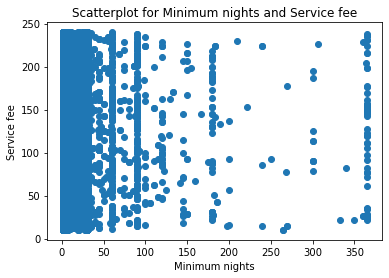

In [17]:
#How does the minimum stay affect the service fee ?
plt.scatter(x=df['minimum_nights'], y=df['service_fee'])

plt.title('Scatterplot for Minimum nights and Service fee')
plt.xlabel('Minimum nights')
plt.ylabel('Service fee')

Hard to determine a correlation between, will need to be investigated further

In [18]:
# What is the average number of listings per host?
review_rate_per_neighbourhood_group = df.groupby('borough')['listings_per_host'].mean()

fig = px.bar(review_rate_per_neighbourhood_group,
            x=review_rate_per_neighbourhood_group.index,
            y=review_rate_per_neighbourhood_group.values,
            labels={'x': 'Borough', 'y': 'Number of Listings Per Host'},
            text=[str(round(i, 2)) for i in review_rate_per_neighbourhood_group.values],
            title='Number of Listings Per Host',
            color_discrete_sequence=px.colors.sequential.algae,
)

fig.update_layout(font=dict(size=20, color='black'))

fig.show()

Most host who own multiple rentals have them in Manhattan

In [19]:
#Does the ability to instantly book affect the price ?
instant_booking_by_price = df.groupby('instant_bookable')['price'].mean()

fig = px.bar(instant_booking_by_price,
            x=instant_booking_by_price.index,
            y=instant_booking_by_price.values,
            labels={'x': 'instant booking', 'y': 'Average Price'},
            text=['$' + str(int(i)) for i in instant_booking_by_price.values],
            title='Average Pricing when compared to instant booking',
            color_discrete_sequence=px.colors.sequential.Bluyl,
)

fig.update_layout(font=dict(size=16, color='black'))

fig.show()

Average prices doesnt have an affect on instant booking. 

In [20]:
#What are the top 10 highest revenue neighborhoods 
top_revenue_neighborhoods = df.groupby('neighborhood')['revenue'].sum()

fig = px.bar(top_revenue_neighborhoods, 
            x=top_revenue_neighborhoods.index, 
            y=top_revenue_neighborhoods.values, 
            labels={'x': 'neighborhood', 'y': 'price'},
            text=[str(i) for i in top_revenue_neighborhoods.values],
            title='Top Revenue Neighborhoods',
)

fig.update_layout(font=dict(size=15, color='black', family='Avenir'))

fig.show()

The top 10 neighborhoods are: Bedford-Stuyvesant, Williamsburg, Harlem, Hells Kitchen, Bushwick, Upper East Side, Upper West Side, Midtown, Crown Heights, East Village, East Harlem

In [21]:
# How many new builds are there for each year?
constructions_per_year = df.groupby('construction_year')['construction_year'].count()

fig = px.bar(constructions_per_year, 
            x=constructions_per_year.index, 
            y=constructions_per_year.values, 
            labels={'x': 'Construction year', 'y': 'Number of constructions'},
            text=[str(i) for i in constructions_per_year.values],
            title='Number of constructions per year',
)

fig.update_layout(font=dict(size=20, color='black', family='Avenir'))

fig.show()

The number of new builds is consistant year over year. 

In [22]:
# Do average prices get higher with newer construction?
price_per_year = df.groupby('construction_year')['price'].median()

fig = px.line(price_per_year,
            x=price_per_year.index,
            y=price_per_year.values,
            labels={'x': 'Construction year', 'y': 'Average price'},
            text=['$' + str(int(i)) for i in price_per_year.values],
            title='Average Rental Price per Year',
            color_discrete_sequence=px.colors.sequential.Teal_r,
)

fig.update_layout(font=dict(size=16, color='black', family='Avenir'))

fig.show()

### 5. Correlations

In [23]:
#creating a correlation matrix using pandas
df.corr()

latitude  longitude  instant_bookable  construction_year  \
latitude            1.000000   0.072303          0.000257           0.006896   
longitude           0.072303   1.000000         -0.004934           0.000145   
instant_bookable    0.000257  -0.004934          1.000000           0.001550   
construction_year   0.006896   0.000145          0.001550           1.000000   
price              -0.005408   0.001988         -0.000174          -0.004290   
service_fee        -0.005371   0.001980         -0.000175          -0.004282   
minimum_nights      0.034033  -0.057681         -0.003661           0.001320   
number_of_reviews  -0.022110   0.064651          0.000522           0.002915   
reviews_per_month  -0.020937   0.118539          0.002299           0.004994   
review_rate_number -0.005204   0.015313          0.002649           0.006237   
listings_per_host   0.027645  -0.091484          0.001714          -0.002357   
Days booked        -0.014352   0.077025         -0.004504          -0.006556   
revenue            -0.014086   0.061618         -0.005391          -0.004232   

                       price  service_fee  minimum_nights  number_of_reviews  \
latitude           -0.005408    -0.005371        0.034033          -0.022110   
longitude           0.001988     0.001980       -0.057681           0.064651   
instant_bookable   -0.000174    -0.000175       -0.003661           0.000522   
construction_year  -0.004290    -0.004282        0.001320           0.002915   
price               1.000000     0.999991       -0.005258           0.004292   
service_fee         0.999991     1.000000       -0.005254           0.004267   
minimum_nights     -0.005258    -0.005254        1.000000          -0.079100   
number_of_reviews   0.004292     0.004267       -0.079100           1.000000   
reviews_per_month   0.004256     0.004233       -0.165519           0.590248   
review_rate_number -0.007151    -0.007162        0.000943          -0.018871   
listings_per_host   0.001081     0.001085        0.122251          -0.080167   
Days booked        -0.000056    -0.000042        0.079380           0.105861   
revenue             0.451191     0.451196        0.059529           0.087773   

                    reviews_per_month  review_rate_number  listings_per_host  \
latitude                    -0.020937           -0.005204           0.027645   
longitude                    0.118539            0.015313          -0.091484   
instant_bookable             0.002299            0.002649           0.001714   
construction_year            0.004994            0.006237          -0.002357   
price                        0.004256           -0.007151           0.001081   
service_fee                  0.004233           -0.007162           0.001085   
minimum_nights              -0.165519            0.000943           0.122251   
number_of_reviews            0.590248           -0.018871          -0.080167   
reviews_per_month            1.000000            0.038396          -0.026163   
review_rate_number           0.038396            1.000000           0.023613   
listings_per_host           -0.026163            0.023613           1.000000   
Days booked                  0.079169           -0.011378           0.136479   
revenue                      0.066486           -0.013055           0.105635   

                    Days booked   revenue  
latitude              -0.014352 -0.014086  
longitude              0.077025  0.061618  
instant_bookable      -0.004504 -0.005391  
construction_year     -0.006556 -0.004232  
price                 -0.000056  0.451191  
service_fee           -0.000042  0.451196  
minimum_nights         0.079380  0.059529  
number_of_reviews      0.105861  0.087773  
reviews_per_month      0.079169  0.066486  
review_rate_number    -0.011378 -0.013055  
listings_per_host      0.136479  0.105635  
Days booked            1.000000  0.788547  
revenue                0.788547  1.000000

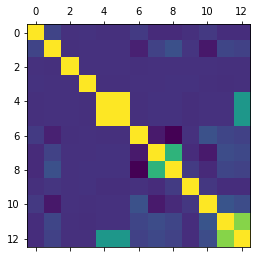

In [24]:
#create correlation heatmap using matplotlib
plt.matshow(df.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

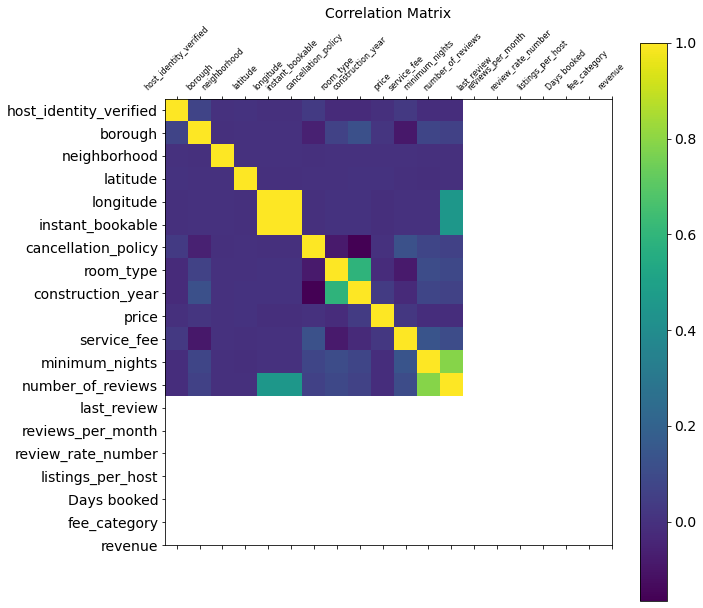

In [25]:
#add labels, a legend, and change the size of the heatmap
f = plt.figure(figsize=(10, 10)) # figure size
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=8, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

###### Looking at the correlation above, it apprears most variables dont have a strong relationship with other variables. However, there is a strong correlation (+1) between price of airbnb and serivce fee, as well as reviews received per months and total reviews (+.59), and price with revenue (+.45)

#### Creating correlations heatmap in seaborn

In [26]:
#checking columns for subgroup
df.columns

Index(['host_identity_verified', 'borough', 'neighborhood', 'latitude',
       'longitude', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'listings_per_host', 'Days booked',
       'fee_category', 'revenue'],
      dtype='object')

In [27]:
#create subset excluding the lat/long columns
sub=df[['host_identity_verified', 'borough', 'neighborhood', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'listings_per_host', 'Days booked', 'revenue']]

In [28]:
#checking it was executed
sub

host_identity_verified    borough        neighborhood  instant_bookable  \
0                unconfirmed   Brooklyn          Kensington             False   
1                   verified  Manhattan             Midtown             False   
2                   verified  Manhattan         East Harlem             False   
3                   verified  Manhattan         Murray Hill              True   
4                unconfirmed   Brooklyn  Bedford-Stuyvesant             False   
...                      ...        ...                 ...               ...   
81558               verified   Brooklyn        Williamsburg              True   
81559            unconfirmed     Queens             Bayside             False   
81560               verified     Queens       East Elmhurst              True   
81561               verified     Queens            Edgemere              True   
81562               verified  Manhattan                SoHo             False   

      cancellation_policy        room_type  construction_year   price  \
0                  strict     Private room             2020.0   966.0   
1                moderate  Entire home/apt             2007.0   142.0   
2                moderate  Entire home/apt             2009.0   204.0   
3                flexible  Entire home/apt             2013.0   577.0   
4                moderate     Private room             2009.0  1060.0   
...                   ...              ...                ...     ...   
81558            flexible     Private room             2020.0  1078.0   
81559            moderate     Private room             2007.0   103.0   
81560              strict     Private room             2022.0   982.0   
81561            moderate     Private room             2020.0   946.0   
81562            flexible  Entire home/apt             2020.0  1043.0   

       service_fee  minimum_nights  number_of_reviews last_review  \
0            193.0            10.0                  9  2021-10-19   
1             28.0            30.0                 45  2022-05-21   
2             41.0            10.0                  9  2018-11-19   
3            115.0             3.0                 74  2019-06-22   
4            212.0            45.0                 49  2017-10-05   
...            ...             ...                ...         ...   
81558        216.0             1.0                 58  2019-06-10   
81559         21.0             7.0                 40  2019-06-23   
81560        196.0             1.0                239  2019-06-29   
81561        189.0             1.0                 76  2019-06-27   
81562        209.0             2.0                 21  2019-07-01   

       reviews_per_month  review_rate_number  listings_per_host  Days booked  \
0                   0.21                   4                  6        286.0   
1                   0.38                   4                  2        228.0   
2                   0.10                   3                  1        289.0   
3                   0.59                   3                  1        365.0   
4                   0.40                   5                  1        219.0   
...                  ...                 ...                ...          ...   
81558               2.08                   5                  2        120.0   
81559               1.51                   1                  5        148.0   
81560               8.58                   2                  2        361.0   
81561               2.84                   1                  1        324.0   
81562               0.74                   4                  2        343.0   

       revenue  
0       276276  
1        32376  
2        58956  
3       210605  
4       232140  
...        ...  
81558   129360  
81559    15244  
81560   354502  
81561   306504  
81562   357749  

[81563 rows x 17 columns]

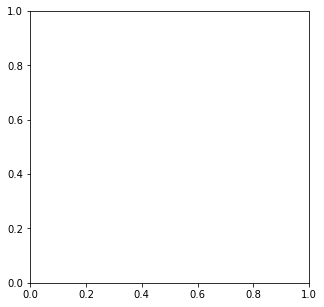

In [29]:
#creating a subplot with matplotlib
f,ax = plt.subplots(figsize =(5,5))

In [30]:
#creating a correlation heatmap in seaborn
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

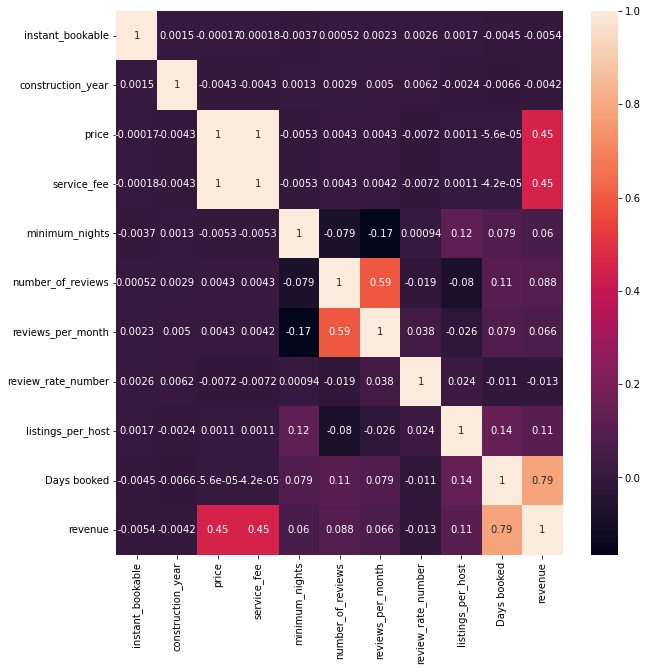

In [31]:
#putting it all together
f,ax = plt.subplots(figsize =(10,10))
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

###### Looking at the correlation above, it apprears most variables dont have a strong relationship with other variables. However, there is a strong correlation (+1) between price of airbnb and serivce fee, as well as reviews received per months and total reviews (+.59), and price with revenue (+.45)

### 6. Scatterplots

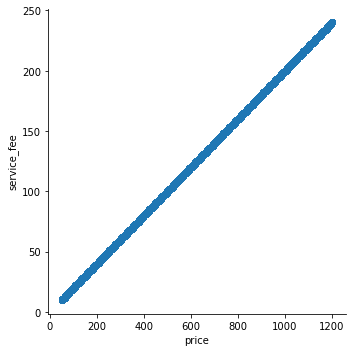

In [32]:
#creating a scatterplot with 'price' and 'service fee'
sns.lmplot(x = 'price', y = 'service_fee', data = df)

There is a strong positive relationship (1) between the price of the rental and the service fee. 

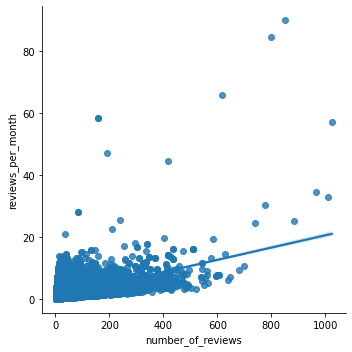

In [33]:
#creating a scatterplot with 'reviews per month' and 'number of reviews'
sns.lmplot(x = 'number_of_reviews', y = 'reviews_per_month', data = df)

Theres a strong positive relationship (.57) between the number of reviews and reviews per month.
As renters leave reviews each momth, the total number of reviews also increases

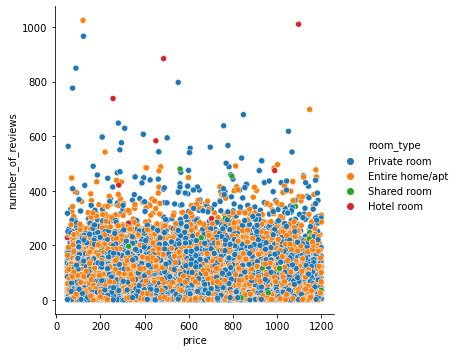

In [34]:
#scatterplot
sns.relplot(data=df, kind='scatter', x='price', y='number_of_reviews', hue='room_type');

### 7. Pair Plots

In [35]:
#viewing colummns for pair plots
df.columns

Index(['host_identity_verified', 'borough', 'neighborhood', 'latitude',
       'longitude', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'listings_per_host', 'Days booked',
       'fee_category', 'revenue'],
      dtype='object')

In [36]:
#creating subgroup for pair plots
sub2=sub[['borough', 'neighborhood', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'listings_per_host', 'Days booked', 'revenue']]

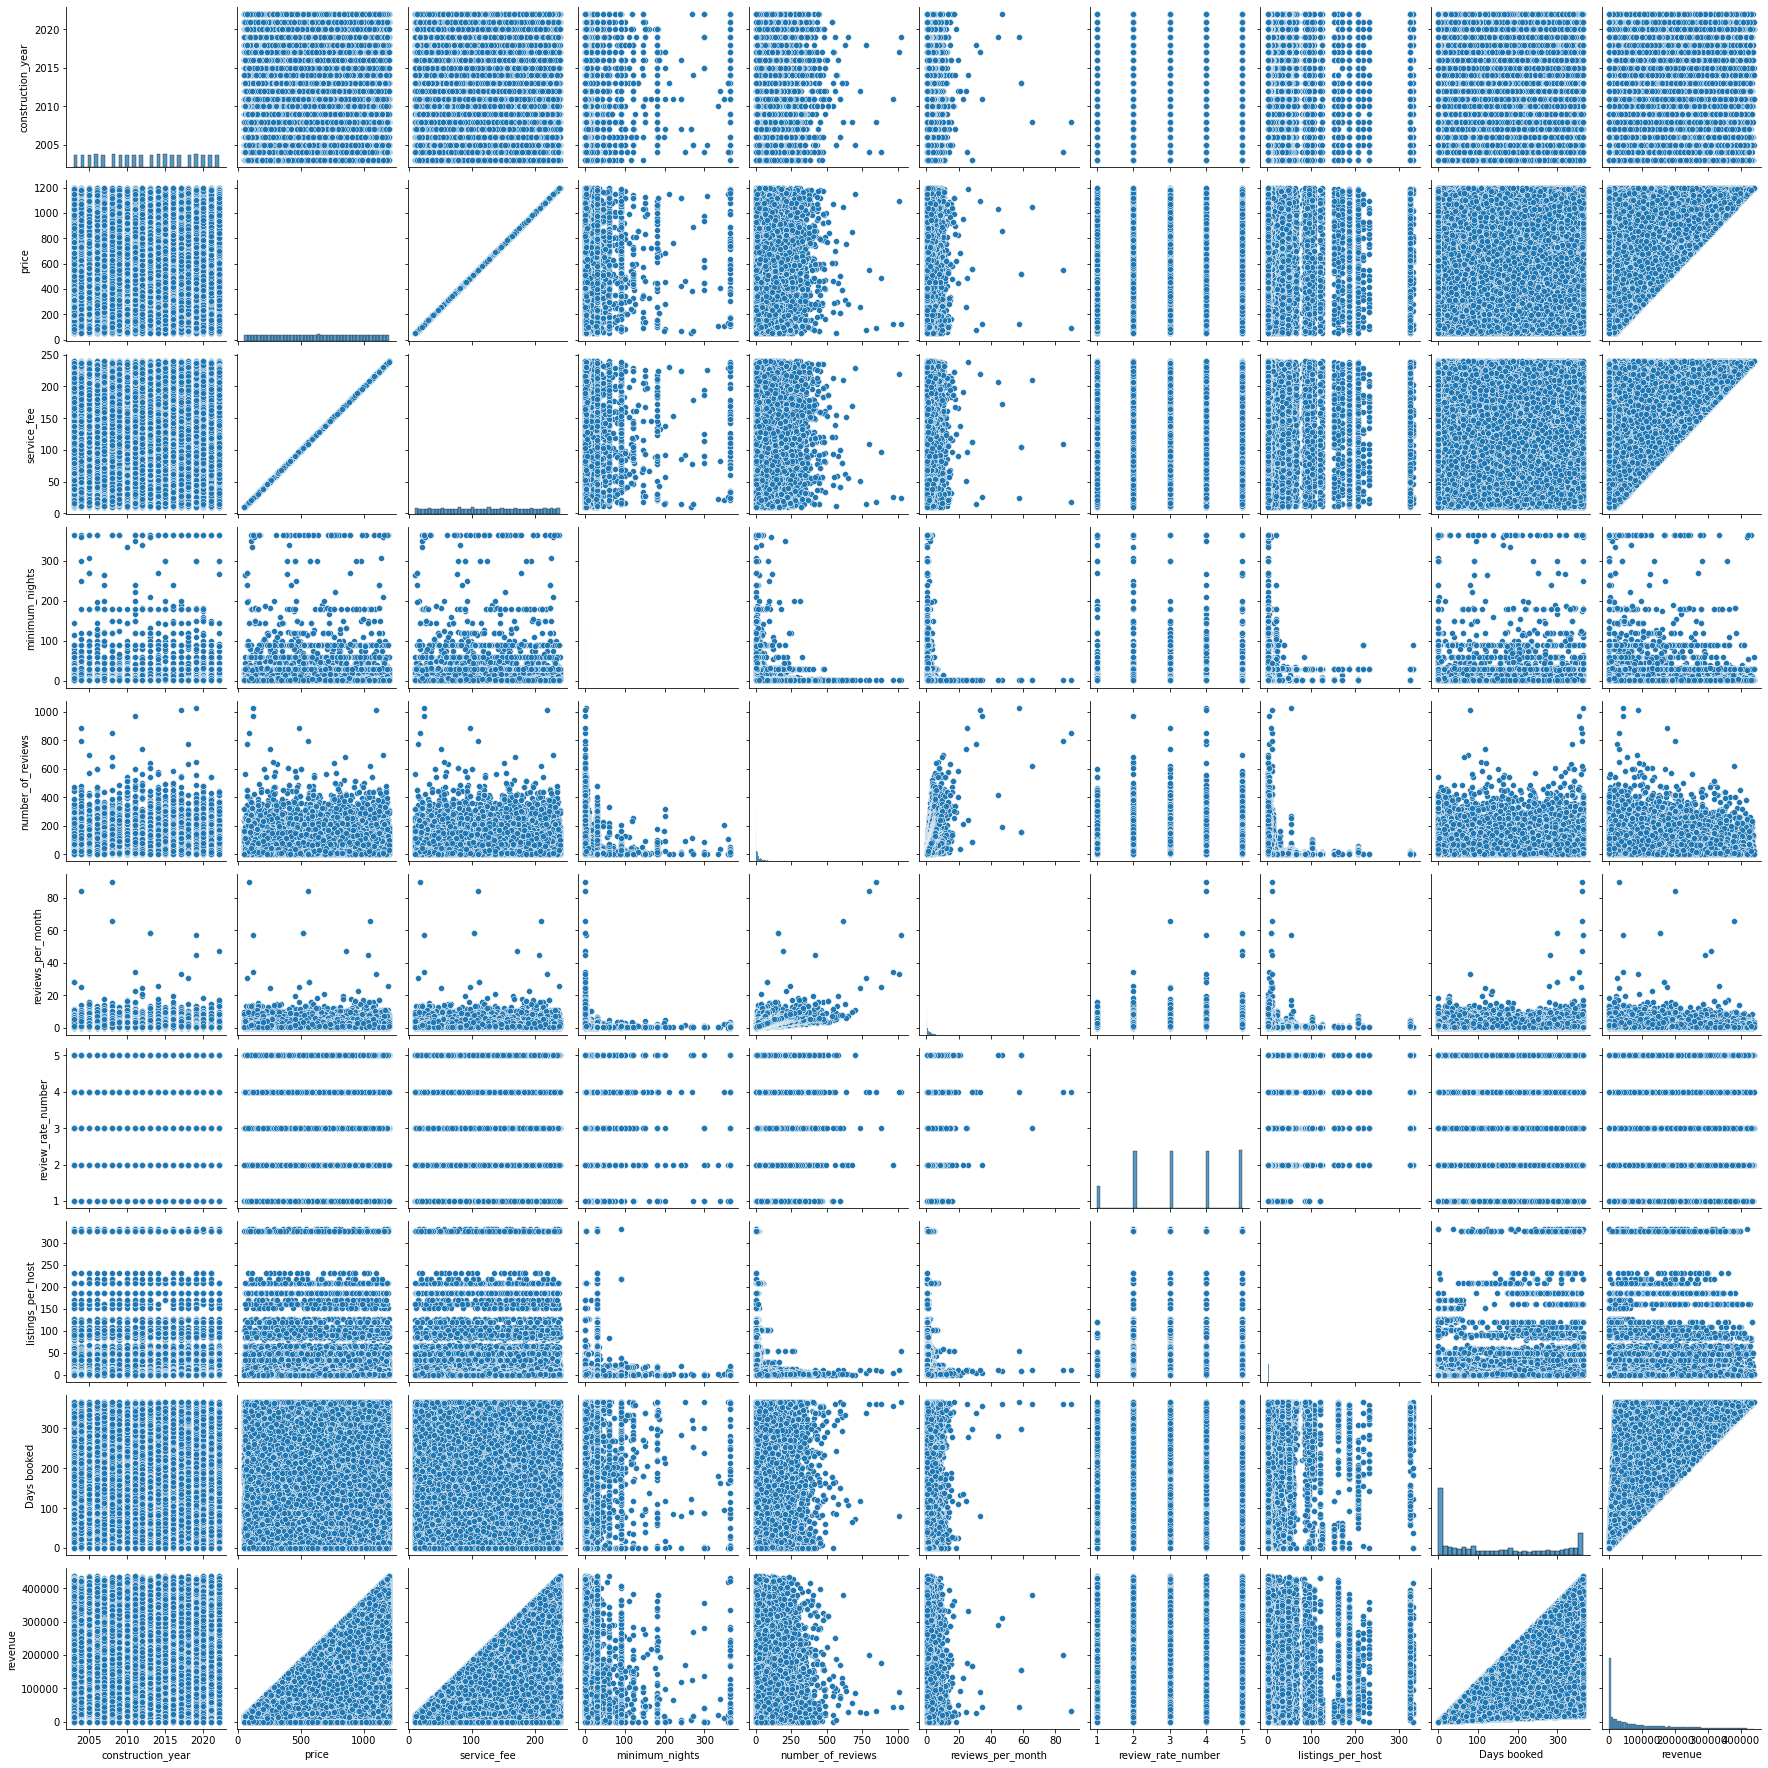

In [37]:
#create a pair plot
g = sns.pairplot(sub2)

A further investigation of listings_per_host when compared with minimum nights, number of reviews, and reviews per month would be interesting to look more into. 

### 8. Categorical Plots

<AxesSubplot:xlabel='price', ylabel='Count'>

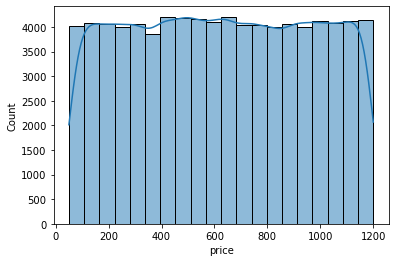

In [38]:
#Creating a categorical variable that splits the 'price' colum into categories
sns.histplot(df['price'], bins = 20, kde = True)

<AxesSubplot:xlabel='service_fee', ylabel='Count'>

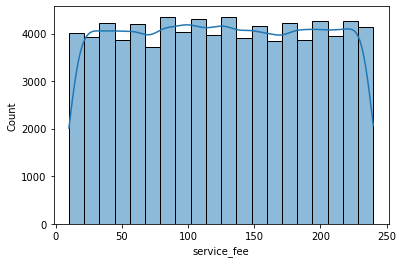

In [39]:
#Creating a categorical variable that splits the 'service_fee' colum into categories
sns.histplot(df['service_fee'], bins = 20, kde = True)

### 9. Hypothesis Exploration

##### If a rental has a higher rate of booking, than it should lead to an increased rate of reviews
##### If certain boroughs are more saught after by renters, then the demand would be higher and increase the price
##### If renters seek more private the accomodation, then the nightly price will be higher
##### If location is a desired amenity for host, than they will have listings in areas in demand

### 9. Export Data

In [40]:
#exporting data
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'NYC_cleaned_data2.csv'))